In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("Nacimientos.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113837 entries, 0 to 113836
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   identificador                113791 non-null  float64
 1   DEPARTAMENTO                 113837 non-null  object 
 2   MUNICIPIO                    113837 non-null  object 
 3   AREA NACIMIENTO              113837 non-null  object 
 4   SITIO NACIMIENTO             113837 non-null  object 
 5   CÓDIGO INSTITUCIÓN           113837 non-null  object 
 6   NOMBRE INSTITUCIÓN           113837 non-null  object 
 7   SEXO                         113837 non-null  object 
 8   PESO (Gramos)                113837 non-null  float64
 9   TALLA (Centímetros)          113837 non-null  int64  
 10  FECHA NACIMIENTO             113837 non-null  object 
 11  PARTO ATENDIDO POR           113837 non-null  object 
 12  TIEMPO DE GESTACIÓN          11381


Valores faltantes por columna:
identificador                      46
DEPARTAMENTO                        0
MUNICIPIO                           0
AREA NACIMIENTO                     0
SITIO NACIMIENTO                    0
CÓDIGO INSTITUCIÓN                  0
NOMBRE INSTITUCIÓN                  0
SEXO                                0
PESO (Gramos)                       0
TALLA (Centímetros)                 0
FECHA NACIMIENTO                    0
PARTO ATENDIDO POR                  0
TIEMPO DE GESTACIÓN                19
NÚMERO CONSULTAS PRENATALES         0
TIPO PARTO                          0
FACTOR RH                        1976
PERTENENCIA ÉTNICA                 22
GRUPO INDIGENA                 113688
TIPO DOCUMENTO MADRE                0
EDAD MADRE                          0
ESTADO CONYUGAL MADRE               0
NIVEL EDUCATIVO MADRE               0
ULTIMO AÑO APROBADO MADRE        1514
PAÍS RESIDENCIA                    18
DEPARTAMENTO RESIDENCIA            94
MUNICIPIO RESIDENC

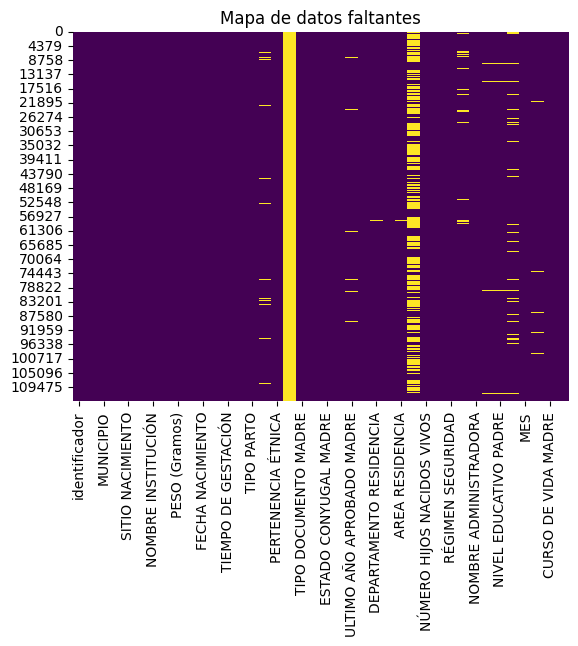

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

In [ ]:
columns_to_drop = [
    'identificador',
    'TIEMPO DE GESTACIÓN',
    'FACTOR RH',
    'GRUPO INDIGENA',
    'ULTIMO AÑO APROBADO MADRE',
    'PAÍS RESIDENCIA',
    'DEPARTAMENTO RESIDENCIA',
    'MUNICIPIO RESIDENCIA',
    'AREA RESIDENCIA',
    'TIPO ADMINISTRADORA',
    'EDAD PADRE',
    'NIVEL EDUCATIVO PADRE',
    'ULTIMO AÑO APROBADO PADRE',
    'NOMBRE COMUNA'
]
df = df.drop(columns=columns_to_drop)
print("Información del dataset después de eliminar las columnas con valores faltantes:")
print(df.info())

Información del dataset después de eliminar las columnas con valores faltantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113837 entries, 0 to 113836
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DEPARTAMENTO                 113837 non-null  object 
 1   MUNICIPIO                    113837 non-null  object 
 2   AREA NACIMIENTO              113837 non-null  object 
 3   SITIO NACIMIENTO             113837 non-null  object 
 4   CÓDIGO INSTITUCIÓN           113837 non-null  object 
 5   NOMBRE INSTITUCIÓN           113837 non-null  object 
 6   SEXO                         113837 non-null  object 
 7   PESO (Gramos)                113837 non-null  float64
 8   TALLA (Centímetros)          113837 non-null  int64  
 9   FECHA NACIMIENTO             113837 non-null  object 
 10  PARTO ATENDIDO POR           113837 non-null  object 
 11  NÚMERO CONSULTAS PRENATALES  113837 n

Columnas eliminadas debido a datos faltantes: ['PERTENENCIA ÉTNICA', 'LOCALIDAD']
Información del dataset después de eliminar las columnas con datos faltantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113837 entries, 0 to 113836
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DEPARTAMENTO                 113837 non-null  object 
 1   MUNICIPIO                    113837 non-null  object 
 2   AREA NACIMIENTO              113837 non-null  object 
 3   SITIO NACIMIENTO             113837 non-null  object 
 4   CÓDIGO INSTITUCIÓN           113837 non-null  object 
 5   NOMBRE INSTITUCIÓN           113837 non-null  object 
 6   SEXO                         113837 non-null  object 
 7   PESO (Gramos)                113837 non-null  float64
 8   TALLA (Centímetros)          113837 non-null  int64  
 9   FECHA NACIMIENTO             113837 non-null  object 
 10  PARTO ATENDIDO P

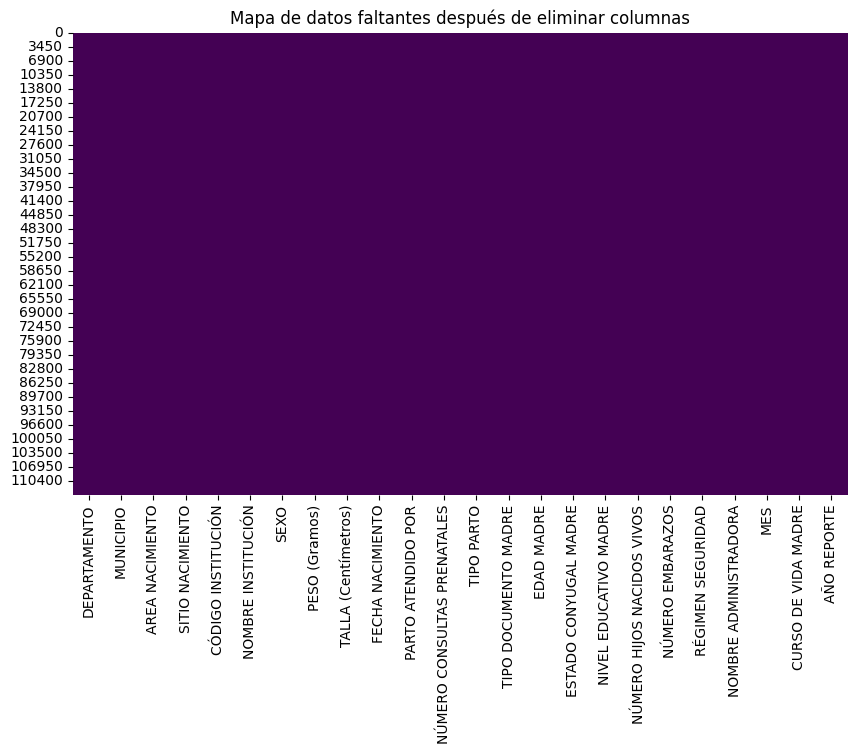

In [ ]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

if columns_with_missing_values:
    df = df.drop(columns=columns_with_missing_values)
    print(f"Columnas eliminadas debido a datos faltantes: {columns_with_missing_values}")
    print("Información del dataset después de eliminar las columnas con datos faltantes:")
    print(df.info())

    # Visualización de nulos después de eliminar columnas
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Mapa de datos faltantes después de eliminar columnas")
    plt.show()
elif not columns_with_missing_values:
    print("No hay columnas con datos faltantes para eliminar.")
    # Visualización de nulos para confirmar que no hay nulos
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Mapa de datos faltantes (No se encontraron nulos)")
    plt.show()

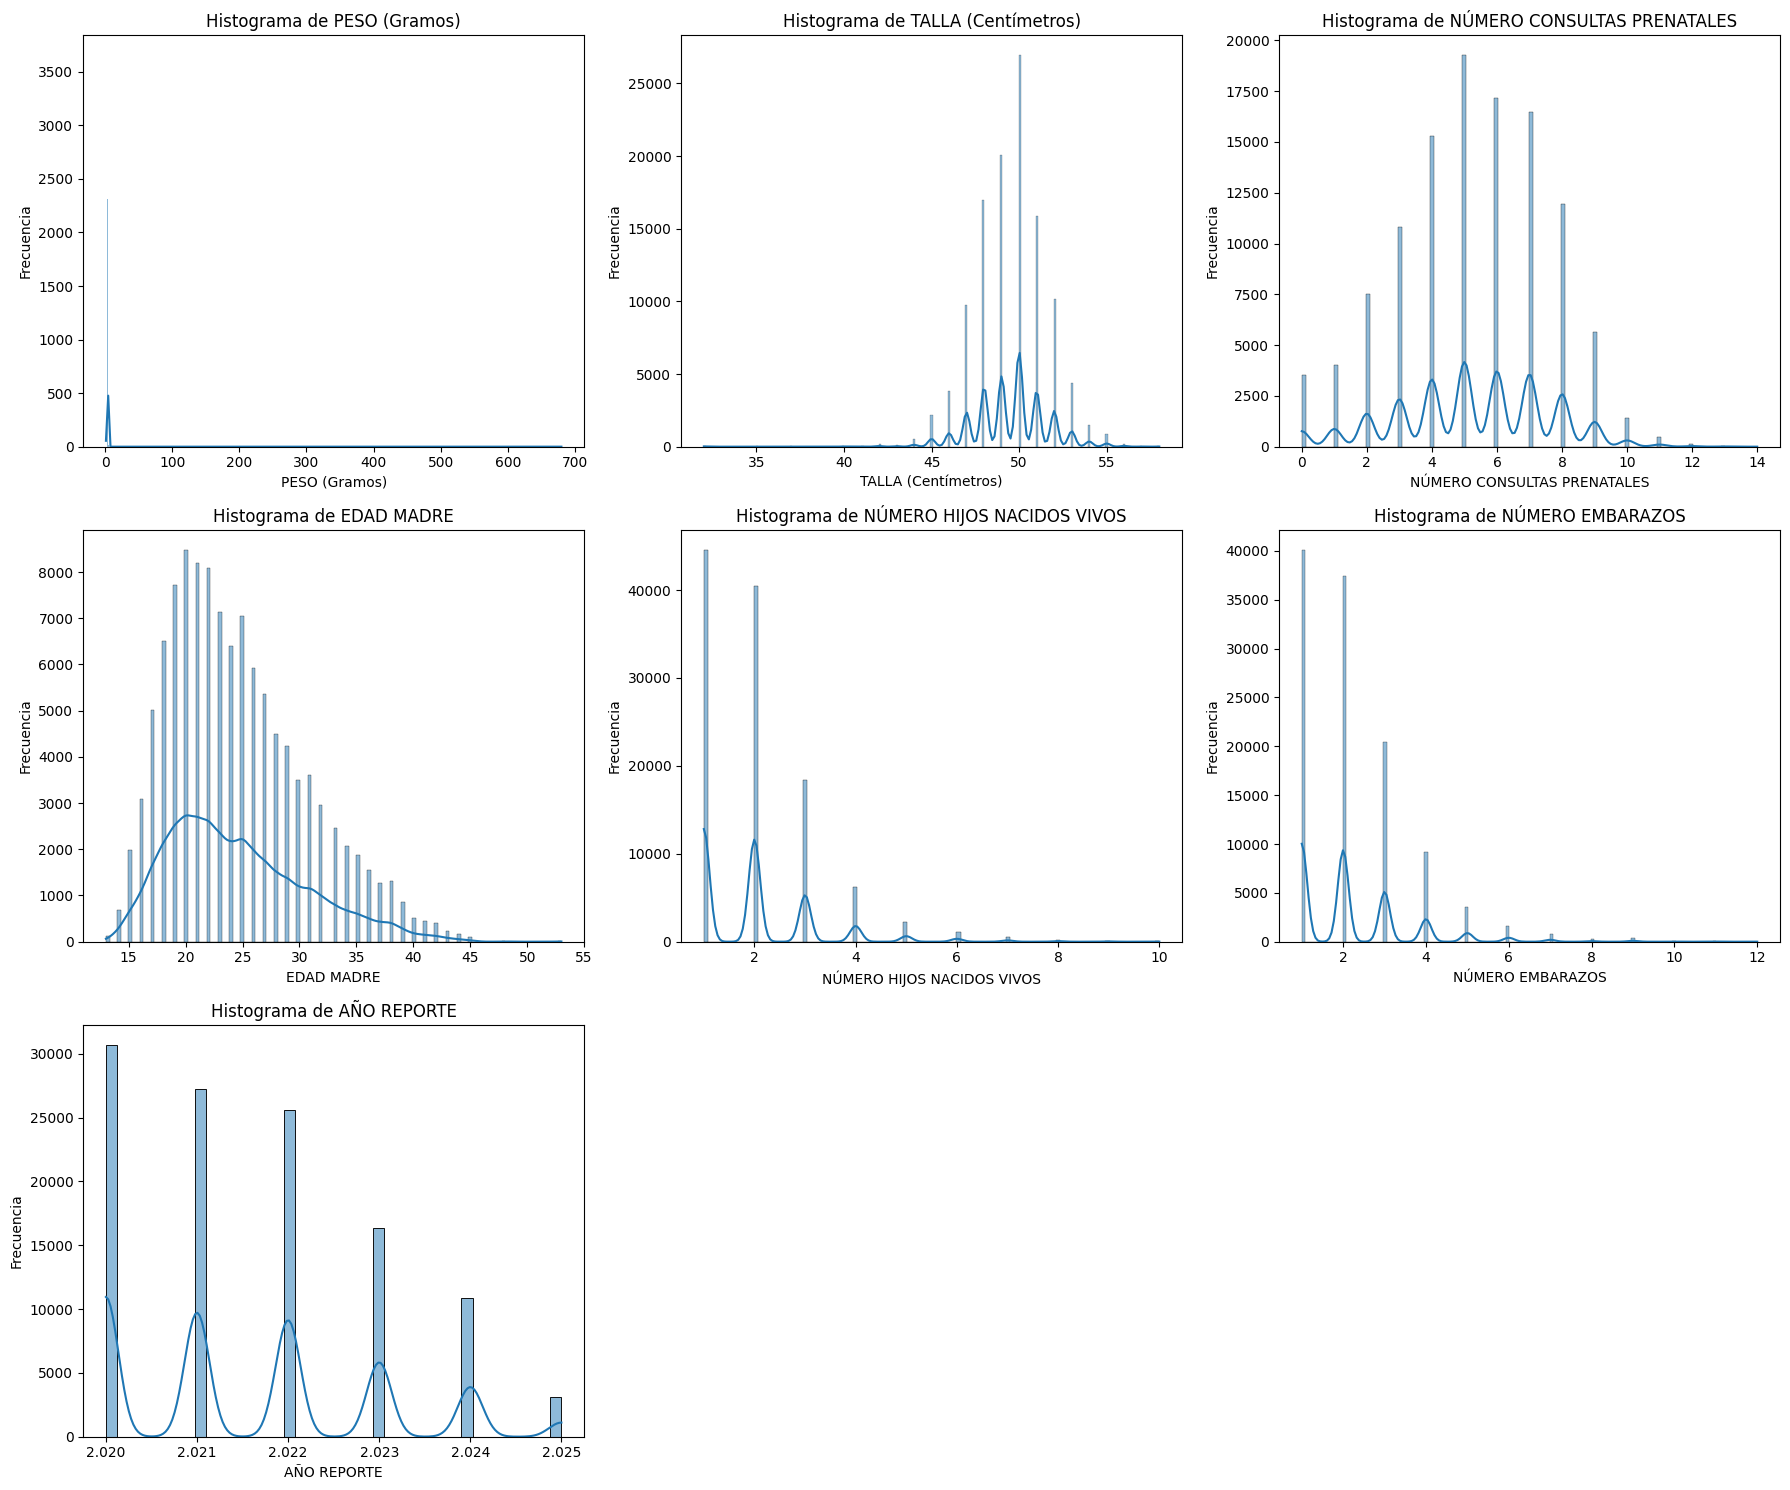

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_cols = df.select_dtypes(include=np.number).columns

if not numerical_cols.empty:
    n_cols = len(numerical_cols)
    n_rows = (n_cols + 2) // 3  # Calculate rows needed for 3 columns per row

    plt.figure(figsize=(18, n_rows * 5))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, 3, i + 1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas numéricas en el DataFrame para generar histogramas.")

Filas antes de la eliminación de atípicos: 113837
Atípicos eliminados en la columna 'PESO (Gramos)'. Filas restantes: 112299
Atípicos eliminados en la columna 'TALLA (Centímetros)'. Filas restantes: 111746
Filas después de la eliminación de atípicos: 111746


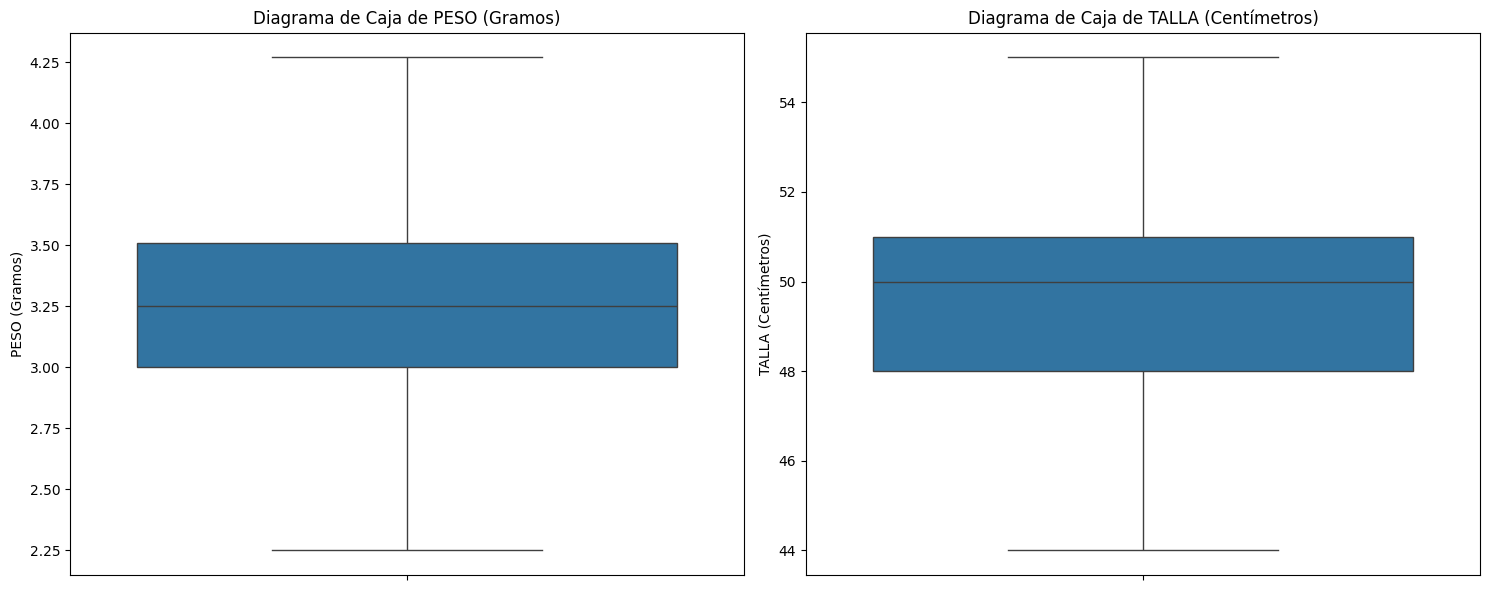

In [ ]:
print(f"Filas antes de la eliminación de atípicos: {len(df)}")

columns_to_check_outliers = ['PESO (Gramos)', 'TALLA (Centímetros)']

for col in columns_to_check_outliers:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(f"Atípicos eliminados en la columna '{col}'. Filas restantes: {len(df)}")
    else:
        print(f"La columna '{col}' no se encuentra en el DataFrame.")

print(f"Filas después de la eliminación de atípicos: {len(df)}")
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to plot
columns_to_plot = ['PESO (Gramos)', 'TALLA (Centímetros)']

plt.figure(figsize=(15, 6))
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Diagrama de Caja de {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


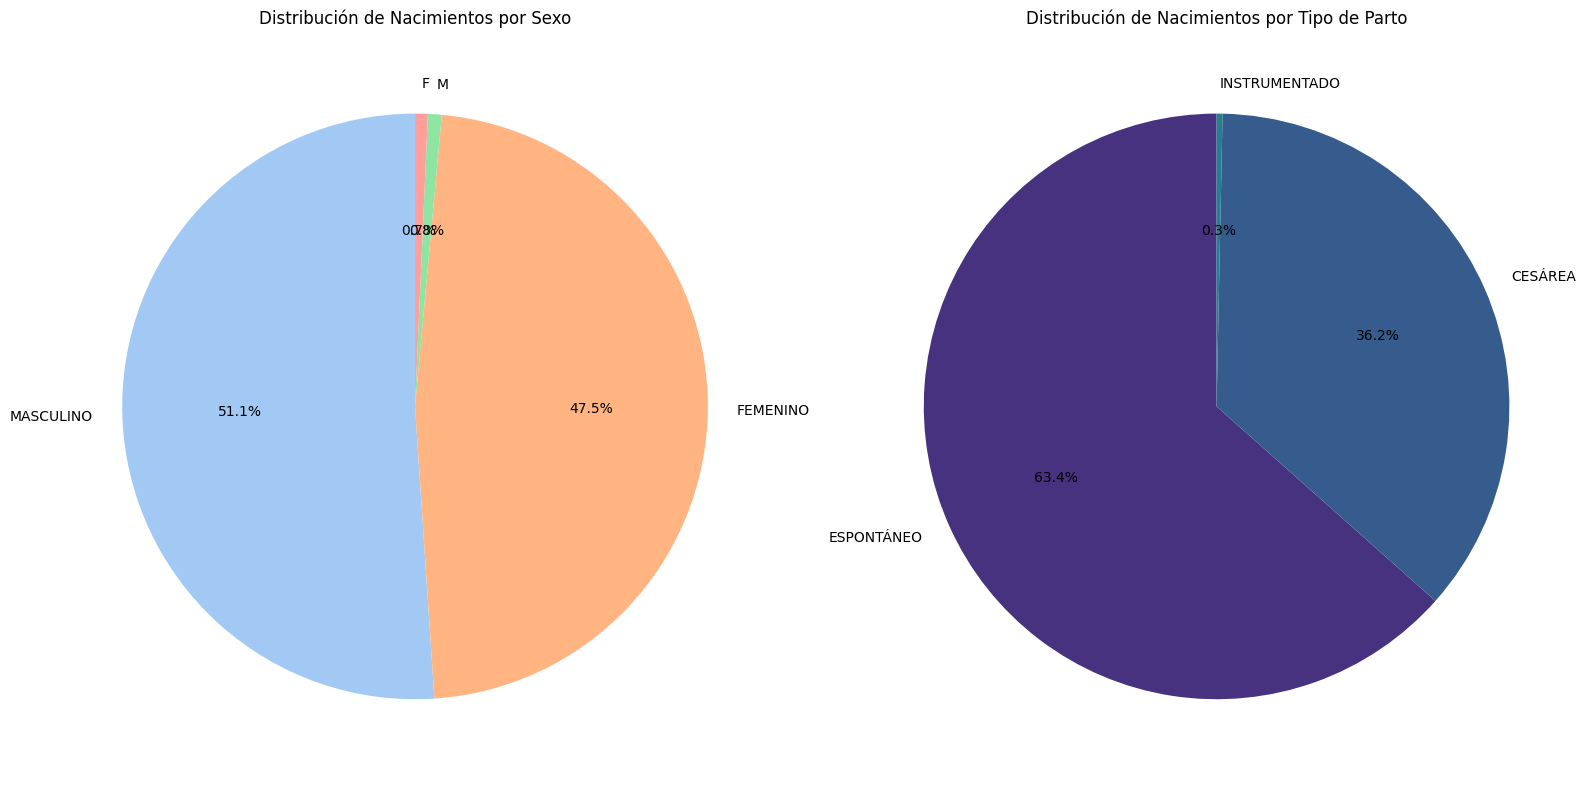

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con dos subplots para los diagramas de torta
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Diagrama de torta para la columna 'SEXO'
gender_counts = df['SEXO'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Distribución de Nacimientos por Sexo')
axes[0].axis('equal') # Asegura que el diagrama sea un círculo

# Diagrama de torta para la columna 'TIPO PARTO'
parto_counts = df['TIPO PARTO'].value_counts()
axes[1].pie(parto_counts, labels=parto_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
axes[1].set_title('Distribución de Nacimientos por Tipo de Parto')
axes[1].axis('equal') # Asegura que el diagrama sea un círculo

plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado
plt.show()

In [ ]:
Q1 = df['PESO (Gramos)'].quantile(0.25)
Q3 = df['PESO (Gramos)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para remover los datos atípicos en 'PESO (Gramos)'
df_filtered = df[(df['PESO (Gramos)'] >= lower_bound) & (df['PESO (Gramos)'] <= upper_bound)]

print(f"Filas originales: {len(df)}")
print(f"Filas después de filtrar atípicos en PESO (Gramos): {len(df_filtered)}")

# Actualizar el DataFrame 'df' con los datos filtrados si es lo que se desea
df = df_filtered.copy()

print("Datos atípicos eliminados en la columna 'PESO (Gramos)' usando IQR.")
print(df.info())

Filas originales: 111746
Filas después de filtrar atípicos en PESO (Gramos): 111746
Datos atípicos eliminados en la columna 'PESO (Gramos)' usando IQR.
<class 'pandas.core.frame.DataFrame'>
Index: 111746 entries, 0 to 113836
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DEPARTAMENTO                 111746 non-null  object 
 1   MUNICIPIO                    111746 non-null  object 
 2   AREA NACIMIENTO              111746 non-null  object 
 3   SITIO NACIMIENTO             111746 non-null  object 
 4   CÓDIGO INSTITUCIÓN           111746 non-null  object 
 5   NOMBRE INSTITUCIÓN           111746 non-null  object 
 6   SEXO                         111746 non-null  object 
 7   PESO (Gramos)                111746 non-null  float64
 8   TALLA (Centímetros)          111746 non-null  int64  
 9   FECHA NACIMIENTO             111746 non-null  object 
 10  PARTO ATENDIDO POR           

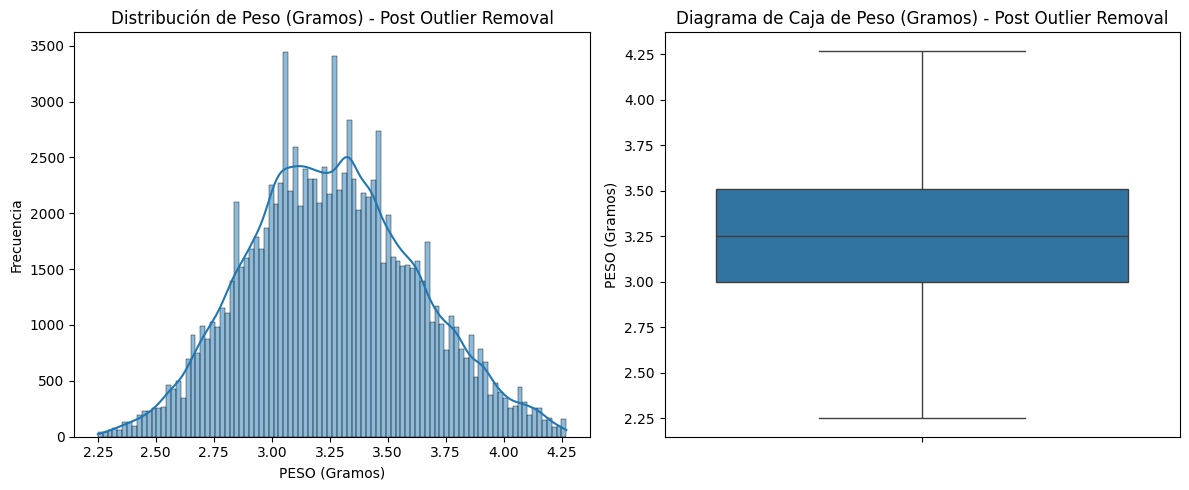

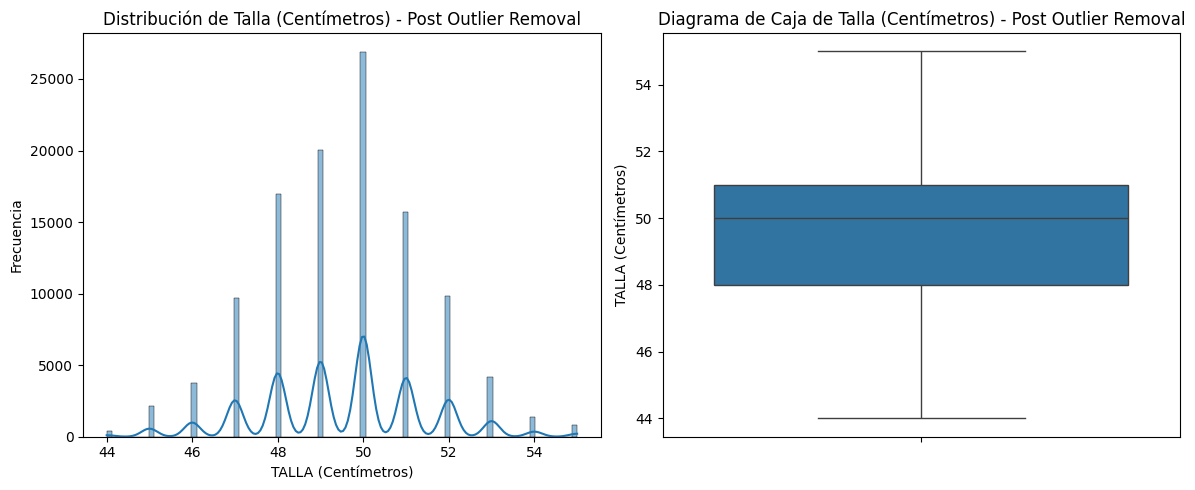

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma y Diagrama de Caja para 'PESO (Gramos)'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['PESO (Gramos)'], kde=True)
plt.title('Distribución de Peso (Gramos) - Post Outlier Removal')
plt.xlabel('PESO (Gramos)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['PESO (Gramos)'])
plt.title('Diagrama de Caja de Peso (Gramos) - Post Outlier Removal')
plt.ylabel('PESO (Gramos)')
plt.tight_layout()
plt.show()

# Histograma y Diagrama de Caja para 'TALLA (Centímetros)'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['TALLA (Centímetros)'], kde=True)
plt.title('Distribución de Talla (Centímetros) - Post Outlier Removal')
plt.xlabel('TALLA (Centímetros)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['TALLA (Centímetros)'])
plt.title('Diagrama de Caja de Talla (Centímetros) - Post Outlier Removal')
plt.ylabel('TALLA (Centímetros)')
plt.tight_layout()
plt.show()


--- Análisis de Normalidad ---

Análisis para la columna: PESO (Gramos)
  Shapiro-Wilk Test: Statistics=0.996, p=0.000
    (Se rechaza H0: Los datos de 'PESO (Gramos)' no parecen ser normales)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 111746.
  res = hypotest_fun_out(*samples, **kwds)


  Kolmogorov-Smirnov Test: Statistics=0.025, p=0.000
    (Se rechaza H0: Los datos de 'PESO (Gramos)' no parecen ser normales)
  Anderson-Darling Test: Statistics=76.291
    (Significance Level 15.0%: Critical Value 0.576. Datos no parecen normales.)
    (Significance Level 10.0%: Critical Value 0.656. Datos no parecen normales.)
    (Significance Level 5.0%: Critical Value 0.787. Datos no parecen normales.)
    (Significance Level 2.5%: Critical Value 0.918. Datos no parecen normales.)
    (Significance Level 1.0%: Critical Value 1.092. Datos no parecen normales.)


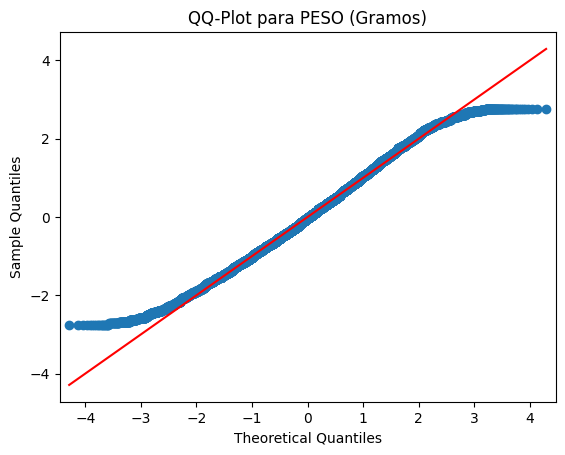


Análisis para la columna: TALLA (Centímetros)
  Shapiro-Wilk Test: Statistics=0.975, p=0.000
    (Se rechaza H0: Los datos de 'TALLA (Centímetros)' no parecen ser normales)
  Kolmogorov-Smirnov Test: Statistics=0.125, p=0.000
    (Se rechaza H0: Los datos de 'TALLA (Centímetros)' no parecen ser normales)
  Anderson-Darling Test: Statistics=1315.379
    (Significance Level 15.0%: Critical Value 0.576. Datos no parecen normales.)
    (Significance Level 10.0%: Critical Value 0.656. Datos no parecen normales.)
    (Significance Level 5.0%: Critical Value 0.787. Datos no parecen normales.)
    (Significance Level 2.5%: Critical Value 0.918. Datos no parecen normales.)
    (Significance Level 1.0%: Critical Value 1.092. Datos no parecen normales.)


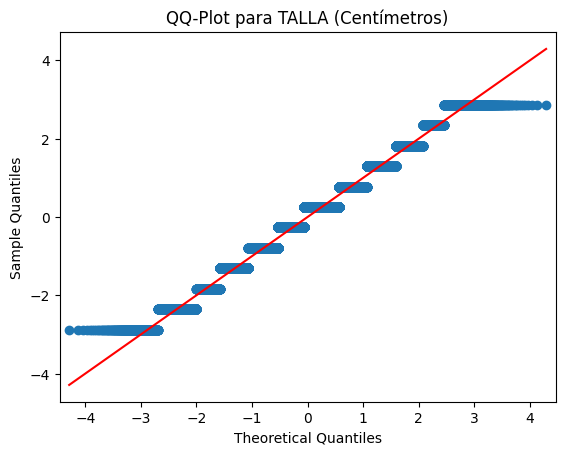


--- Conclusiones ---
Los tests de normalidad y los QQ-plots nos ayudan a evaluar si la distribución de las variables se asemeja a una distribución normal. Un valor p > 0.05 en Shapiro-Wilk y Kolmogorov-Smirnov sugiere que no podemos rechazar la hipótesis nula de normalidad. En el test de Anderson-Darling, si la estadística es menor que los valores críticos, se considera normal.
Los QQ-plots muestran los cuantiles de los datos frente a los cuantiles teóricos de una distribución normal. Si los puntos se alinean a lo largo de la línea recta, indica una distribución normal.
Basándonos en los resultados impresos y la inspección visual de los QQ-plots, se puede determinar si el 'PESO (Gramos)' y la 'TALLA (Centímetros)' siguen una distribución normal después de la eliminación de outliers.


In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

columns_for_normality = ['PESO (Gramos)', 'TALLA (Centímetros)']

print("\n--- Análisis de Normalidad ---")

for col in columns_for_normality:
    print(f"\nAnálisis para la columna: {col}")
    data = df[col].dropna() # Asegurarse de no tener NaNs en los datos para los tests

    if len(data) < 3: # Shapiro-Wilk requiere al menos 3 puntos de datos
        print(f"No hay suficientes datos ({len(data)}) en la columna '{col}' para realizar los tests de normalidad.")
        continue

    # Test de Shapiro-Wilk
    stat_shapiro, p_shapiro = stats.shapiro(data)
    print(f"  Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p={p_shapiro:.3f}")
    if p_shapiro > 0.05:
        print(f"    (No se puede rechazar H0: Los datos de '{col}' parecen ser normales)")
    else:
        print(f"    (Se rechaza H0: Los datos de '{col}' no parecen ser normales)")

    # Test de Kolmogorov-Smirnov (Lilliefors)
    # stats.kstest se usa con distribuciones conocidas. Para probar normalidad en datos empíricos
    # con parámetros estimados (media, std), se prefiere el test de Lilliefors o la corrección.
    # Aquí usamos ks_2samp para comparar con una distribución normal generada, o asumimos parámetros conocidos.
    # Para una mejor práctica, se usaría un test adaptado para parámetros estimados (como statsmodels.stats.diagnostic.kstest_normal)
    # o se estandarizan los datos y se compara con la normal estándar.
    # Por simplicidad y dada la naturaleza exploratoria, usaremos kstest contra 'norm' con mean/std de los datos.
    stat_ks, p_ks = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"  Kolmogorov-Smirnov Test: Statistics={stat_ks:.3f}, p={p_ks:.3f}")
    if p_ks > 0.05:
        print(f"    (No se puede rechazar H0: Los datos de '{col}' parecen ser normales)")
    else:
        print(f"    (Se rechaza H0: Los datos de '{col}' no parecen ser normales)")

    # Test de Anderson-Darling
    result_ad = stats.anderson(data, dist='norm')
    print(f"  Anderson-Darling Test: Statistics={result_ad.statistic:.3f}")
    for i in range(len(result_ad.critical_values)):
        sl, cv = result_ad.significance_level[i], result_ad.critical_values[i]
        if result_ad.statistic < cv:
            print(f"    (Significance Level {sl}%: Critical Value {cv:.3f}. Datos parecen normales.)")
        else:
            print(f"    (Significance Level {sl}%: Critical Value {cv:.3f}. Datos no parecen normales.)")

    # QQ-plot
    fig = sm.qqplot(data, line='s', fit=True)
    plt.title(f'QQ-Plot para {col}')
    plt.show()

print("\n--- Conclusiones ---")
print("Los tests de normalidad y los QQ-plots nos ayudan a evaluar si la distribución de las variables se asemeja a una distribución normal. Un valor p > 0.05 en Shapiro-Wilk y Kolmogorov-Smirnov sugiere que no podemos rechazar la hipótesis nula de normalidad. En el test de Anderson-Darling, si la estadística es menor que los valores críticos, se considera normal.")
print("Los QQ-plots muestran los cuantiles de los datos frente a los cuantiles teóricos de una distribución normal. Si los puntos se alinean a lo largo de la línea recta, indica una distribución normal.")
print("Basándonos en los resultados impresos y la inspección visual de los QQ-plots, se puede determinar si el 'PESO (Gramos)' y la 'TALLA (Centímetros)' siguen una distribución normal después de la eliminación de outliers.")